# Final Project Report

* Class: DS 5100
* Student Name: Grace Davenport
* Student Net ID: mha4rh
* This URL: a URL to the notebook source of this document

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/davenpgh/davenpgh_ds5100_montecarlo

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```
import pandas as pd
import numpy as np

class die:
    '''
    Come roll a die! *fun guarenteed*
    Customizable die with faces and weights; can be rolled one or more times to select a face.
    '''
    
    def __init__(self, faces):
        '''
        Create your die!
        
        Input: faces (all letters or all numbers)
        Faces must be distinct and placed in a numpy array.
        Default weight = 1.0 for each face (fair die)
        '''
        self.faces = faces
        self.__df = pd.DataFrame({'faces':faces,
                     'weights':[1.0 for f in faces]}).set_index('faces')
        
        #are faces in an array?
        if not isinstance(faces, np.ndarray):
            raise TypeError("Faces not an array")
        
        #are faces distinct?
        if len(np.unique(faces)) != len(faces):
            raise ValueError("Values not distinct")
            
    def change_weight(self, face_val, new_weight):
        '''
        Want to create an unfair die?
        
        Input: face you want to change
        Input: corresponding new weight
        
        Face must appear in previous numpy array. 
        Weight must be numeric (int or float) or castable to numeric. 
        '''
        self.face_val = face_val
        self.new_weight = new_weight
        
        #is face on die?
        if face_val not in self.__df.index:
            raise IndexError("Face not on die")
        
        self.__df.loc[face_val] = new_weight
      
        #is weight numeric?
        if not isinstance(new_weight, (int,float)):
            raise TypeError("Weight not numeric")
        
        #can weight be cast to int?
        try:
            new_weight = int(new_weight)
        except:
            raise TypeError("Weight not numeric")

        #can weight be cast to float?
        try:
            new_weight = float(new_weight)
        except:
            raise TypeError("Weight not numeric")
            
    def roll_die(self, n_roll = 1):
        '''
        Roll your die!
        
        Input: number of rolls (integer). Default = 1 roll
        Return: list of faces rolled
        '''
        return self.__df.sample(n_roll, weights=self.__df.weights, replace=True).index.to_list()
        
    def current_state(self):
        '''
        What does my die look like?
        
        Input: none
        Return: dataframe with faces (index) and their corresponding weights
        '''
        return self.__df.copy()
    

class game:
    '''
    This game allows a used to roll one or more similar die, one or more times.
    Each die must have the same number of faces, but can be weighted differently.
    '''
    
    def __init__(self, dice):
        '''
        Place one or more die into the game.
        
        Input: list of pre-instantiated dice
        '''
        self.dice = dice
        
    def play(self, n_roll):
        '''
        Roll your dice!
        
        Input: number of rolls (integer)
        '''
        self.n_roll = n_roll
        self.__df = pd.DataFrame({'Roll_number': range(n_roll)}).set_index("Roll_number")
        
        for die in self.dice:
            new_roll = pd.DataFrame({die: die.roll_die(n_roll)})
            self.__df = pd.concat([self.__df, new_roll], axis = 1, ignore_index = True)
            
        self.__df = self.__df.rename_axis(index= "Roll Number", columns = 'Die Number')
        
    def results(self, style = 'wide'):
        '''
        See your results!
        
        Input: style of dataframe containing dice results. Either 'wide' or 'narrow'. 
        Default = 'wide'
        Return: narrow dataframe with dice results. Multiindex of roll number 
        and die number with corresponding column of face results. 
        '''
        self.style = style
        if style == 'narrow':
            return self.__df.copy()
        elif style == 'wide':
            return self.__df.copy().stack().reset_index().set_index(["Roll Number", "Die Number"]).rename({0:'Face Rolled'}, axis=1)
        else:
            raise ValueError ("Try 'wide' or 'narrow'") 


class analyzer:
    '''
    Analyze game results! caution: fun may occur
    Input your results of a single game and compute descriptive statistics.
    '''
    def __init__(self, game):
        '''
        Place game into analyzer.
        
        Input: game object. Game must be of game class
        '''
        self.game = game
        if game.__class__.__name__ != 'game':
            raise ValueError("Object must be of game class")
            
    def jackpot(self):
        '''
        Compute jackpot (when all die roll same face)
        
        Input: none
        Return: number of jackpots (integer)
        '''
        df = self.game.results().unstack()
        results = sum(df.eq(df.iloc[:, 0], axis=0).all(1))
        return results
    
    def face_count(self):
        '''
        Compute the number of times a given face is rolled in each event.        
        
        Input: none
        Return: dataframe with roll number as index and face rolled as columns.
        Count values in cells. Fill value = 0.
        '''
        df = self.game.results()
        result_df = df.pivot_table(index='Roll Number', columns='Face Rolled', aggfunc='size', fill_value=0)
        result_df = result_df.reindex(columns=self.game.dice[0].faces, fill_value=0)
        return result_df
    
    def combo_count(self):
        '''
        Computes the distinct combinations of faces rolled, along with their counts.
        Combinations are order-independent and may contain repetitions.

        Input: none
        Return: dataframe with multindex of distinct combinations and corresponding count column.
        '''
        df = df = self.game.results().unstack()
        results = pd.DataFrame(np.sort(df.values, axis=1), columns=df.columns).value_counts()
        return pd.DataFrame(results)

    def perm_count(self):
        '''
        Computes the distinct permutations of faces rolled, along with their counts.
        Combinations are order-dependent and may contain repetitions.

        Input: none
        Return: dataframe with multindex of distinct permutations and corresponding count column.
        '''
        df = self.game.results().unstack()
        #I think this should work...
        cols = [('Face Rolled', self.game.dice.index(die)) for die in self.game.dice]
        results = df.groupby(cols).size()
        return pd.DataFrame(results).rename({0:'count'},axis=1)
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
from combined import die, game, analyzer
import unittest
import pandas as pd
import numpy as np

class combinedTestSuite(unittest.TestCase):
    
    def test_1_die(self):
        die1 = die(np.array([1,2,3,4,5,6]))
        message = "die is not array"
        self.assertTrue(isinstance(die1.faces, np.ndarray), message)
        
    def test_2_die(self):
        die1 = die(np.array([1,2,3,4,5,6]))
        die1.change_weight(1,10)
        message = "weight is not numeric"
        self.assertTrue(isinstance(die1.new_weight, (int,float)), message)
        
    def test_3_die(self):
        die1 = die(np.array([1,2,3,4,5,6]))
        message = "return is not a list"
        self.assertTrue(isinstance(die1.roll_die(), list), message)
        
    def test_4_die(self):
        die1 = die(np.array([1,2,3,4,5,6]))
        message = "return is not a dataframe"
        self.assertTrue(isinstance(die1.current_state(), pd.DataFrame), message)

    def test_1_game(self):
        die1 = die(np.array([1,2,3,4,5,6]))
        die2 = die(np.array([1,2,3,4,5,6]))
        die2.change_weight(1,10)
        game1 = game([die1,die2])
        message = "Dice are not in list form"
        self.assertTrue(isinstance(game1.dice, list), message)
        
    def test_2_game(self):
        die1 = die(np.array([1,2,3,4,5,6]))
        die2 = die(np.array([1,2,3,4,5,6]))
        die2.change_weight(1,10)
        game1 = game([die1,die2])
        game1.play(5)
        expected = 5
        self.assertEqual(game1.n_roll, expected)
        
    def test_3_game(self):
        die1 = die(np.array([1,2,3,4,5,6]))
        die2 = die(np.array([1,2,3,4,5,6]))
        die2.change_weight(1,10)
        game1 = game([die1,die2])
        game1.play(5)
        game1.results('wide')
        expected = 'wide'
        self.assertEqual(game1.style, expected)

    def test_1_analyzer(self):
        die1 = die(np.array([1,2,3,4,5,6]))
        die2 = die(np.array([1,2,3,4,5,6]))
        die2.change_weight(1,10)
        game1 = game([die1,die2])
        game1.play(5)
        
        analyzer1 = analyzer(game1)
        message = "game is not of game class"
        self.assertTrue(game1.__class__.__name__ == 'game', message)
        
    def test_2_analyzer(self):
        die1 = die(np.array([1,2,3,4,5,6]))
        die2 = die(np.array([1,2,3,4,5,6]))
        die2.change_weight(1,10)
        game1 = game([die1,die2])
        game1.play(5)
        
        analyzer1 = analyzer(game1)
        message = "output is not an integer"
        self.assertTrue(isinstance(analyzer1.jackpot(), int), message)
        
    def test_3_analyzer(self):
        die1 = die(np.array([1,2,3,4,5,6]))
        die2 = die(np.array([1,2,3,4,5,6]))
        die2.change_weight(1,10)
        game1 = game([die1,die2])
        game1.play(5)
        
        analyzer1 = analyzer(game1)
        message = "return is not a dataframe"
        self.assertTrue(isinstance(analyzer1.face_count(), pd.DataFrame), message)
        
    def test_4_analyzer(self):
        die1 = die(np.array([1,2,3,4,5,6]))
        die2 = die(np.array([1,2,3,4,5,6]))
        die2.change_weight(1,10)
        game1 = game([die1,die2])
        game1.play(5)
        
        analyzer1 = analyzer(game1)
        message = "return is not a dataframe"
        self.assertTrue(isinstance(analyzer1.combo_count(), pd.DataFrame), message)
    
    def test_5_analyzer(self):
        die1 = die(np.array([1,2,3,4,5,6]))
        die2 = die(np.array([1,2,3,4,5,6]))
        die2.change_weight(1,10)
        game1 = game([die1,die2])
        game1.play(5)
        
        analyzer1 = analyzer(game1)
        message = "return is not a dataframe"
        self.assertTrue(isinstance(analyzer1.perm_count(), pd.DataFrame), message)

if __name__ == '__main__':
    unittest.main(verbosity=2)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```
!python combined_test.py

test_1_analyzer (__main__.combinedTestSuite) ... ok
test_1_die (__main__.combinedTestSuite) ... ok
test_1_game (__main__.combinedTestSuite) ... ok
test_2_analyzer (__main__.combinedTestSuite) ... ok
test_2_die (__main__.combinedTestSuite) ... ok
test_2_game (__main__.combinedTestSuite) ... ok
test_3_analyzer (__main__.combinedTestSuite) ... ok
test_3_die (__main__.combinedTestSuite) ... ok
test_3_game (__main__.combinedTestSuite) ... ok
test_4_analyzer (__main__.combinedTestSuite) ... ok
test_4_die (__main__.combinedTestSuite) ... ok
test_5_analyzer (__main__.combinedTestSuite) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.086s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
from davenpgh_ds5100_montecarlo.Package import montecarlo

In [2]:
from davenpgh_ds5100_montecarlo import Package

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [3]:
help(montecarlo)

Help on module davenpgh_ds5100_montecarlo.Package.montecarlo in davenpgh_ds5100_montecarlo.Package:

NAME
    davenpgh_ds5100_montecarlo.Package.montecarlo

CLASSES
    builtins.object
        analyzer
        die
        game
    
    class analyzer(builtins.object)
     |  analyzer(game)
     |  
     |  Analyze game results! caution: fun may occur
     |  Input your results of a single game and compute descriptive statistics.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Place game into analyzer.
     |      
     |      Input: game object. Game must be of game class
     |  
     |  combo_count(self)
     |      Computes the distinct combinations of faces rolled, along with their counts.
     |      Combinations are order-independent and may contain repetitions.
     |      
     |      Input: none
     |      Return: dataframe with multindex of distinct combinations and corresponding count column.
     |  
     |  face_count(self)
     | 

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: 

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [6]:
import pandas as pd
import numpy as np

In [7]:
coin_fair = Package.die(np.array(['H','T']))
coin_unfair = Package.die(np.array(['H','T']))
coin_unfair.change_weight('H', 5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [8]:
die_fair = Package.die(np.array([1,2,3,4,5,6]))

In [9]:
game1 = Package.game([die_fair,die_fair])
game1.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [11]:
die_unfair = Package.die(np.array([1,2,3,4,5,6]))
die_unfair.change_weight([1],10)

In [12]:
game2 = Package.game([die_unfair, die_unfair, die_fair])
game2.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [13]:
analyzer1 = Package.analyzer(game1)
analyzer2 = Package.analyzer(game2)

In [14]:
analyzer1.jackpot()

175

In [15]:
analyzer2.jackpot()

77

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [16]:
analyzer1.jackpot()/1000

0.175

In [17]:
analyzer2.jackpot()/1000

0.077

In [18]:
freq = pd.DataFrame({'game': ['game 1', 'game 2'], 'results': [analyzer1.jackpot()/1000, analyzer2.jackpot()/1000]})

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

In [19]:
freq

,game,results
0,game 1,0.175
1,game 2,0.077


In [20]:
import seaborn as sns

<AxesSubplot:xlabel='game', ylabel='results'>

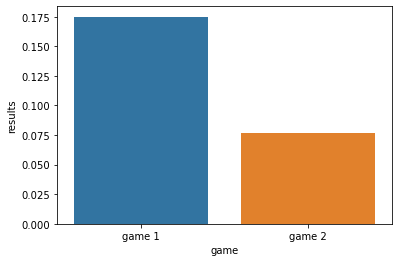

In [21]:
sns.barplot(data=freq, x='game', y='results')

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [22]:
die_1 = Package.die(np.array([1,2,3,4,5,6]))
die_2 = Package.die(np.array([1,2,3,4,5,6]))
die_3 = Package.die(np.array([1,2,3,4,5,6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [23]:
die_1.change_weight([6],5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [24]:
die_2.change_weight([1],5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [25]:
game1 = Package.game([die_fair,die_fair,die_fair,die_fair,die_fair])
game1.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [26]:
game2 = Package.game([die_1, die_2, die_fair, die_fair, die_fair])
game2.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [27]:
analyzer1 = Package.analyzer(game1)
analyzer2 = Package.analyzer(game2)

In [28]:
freq = pd.DataFrame({'game': ['game 1', 'game 2'], 'results': [analyzer1.jackpot()/10000, analyzer2.jackpot()/10000]})

In [29]:
freq

,game,results
0,game 1,0.0006
1,game 2,0.0007


<AxesSubplot:xlabel='game', ylabel='results'>

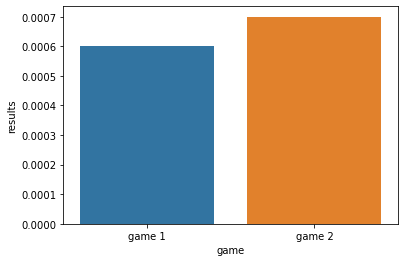

In [30]:
sns.barplot(data=freq, x='game', y='results')

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [31]:
import pandas as pd
import numpy as np

In [32]:
english_letters = pd.read_csv('english_letters.txt', sep=' ', header=None)

In [ ]:
english_letters

In [33]:
letters = english_letters[0].to_list()

In [34]:
weights = english_letters[1].to_list()

In [35]:
die_letters = Package.die(np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']))

In [36]:
for face, weight in zip(letters, weights):
    die_letters.change_weight(face, weight)

In [37]:
die_letters.current_state()

,weights
faces,
A,374061888.0
B,70195826.0
C,138416451.0
D,169330528.0
E,529117365.0
F,95422055.0
G,91258980.0
H,216768975.0
I,320410057.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [39]:
game_letters = Package.game([die_letters,die_letters,die_letters,die_letters])

In [72]:
game_letters.play(1000)
analyzer_letters = Package.analyzer(game_letters)
analyzer_letters = analyzer_letters.perm_count().reset_index()
analyzer_letters['word'] = analyzer_letters[('Face Rolled', 0)] + analyzer_letters[('Face Rolled', 1)] + analyzer_letters[('Face Rolled', 2)] + analyzer_letters[('Face Rolled', 3)]

,"(Face Rolled, 0)","(Face Rolled, 1)","(Face Rolled, 2)","(Face Rolled, 3)",0,word
0,I,D,S,I,2,IDSI
1,S,I,I,O,2,SIIO
2,O,R,S,T,2,ORST
3,N,A,O,E,2,NAOE
4,N,N,A,O,2,NNAO
...,...,...,...,...,...,...
987,O,N,A,S,1,ONAS
988,O,M,T,M,1,OMTM
989,O,M,H,A,1,OMHA
990,O,I,R,V,1,OIRV


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [89]:
scrabble = pd.read_csv('scrabble_words.txt', sep=' ', header=None)

279494

In [94]:
#test merge
df_merge = pd.merge(analyzer_letters, scrabble,
                      left_on = ['word'],
                      right_on = [0],
                      how='outer',
                      validate='one_to_many',
                      indicator='matched')

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/pandas/core/indexes/base.py:2462: RuntimeWarning: '<' not supported between instances of 'int' and 'tuple', sort order is undefined for incomparable objects
  return Index.union(this, other, sort=sort).astype(object, copy=False)


In [95]:
df_merge['matched'].value_counts()

right_only    279449
left_only        945
both              47
Name: matched, dtype: int64

In [96]:
#real merge
df_merge = pd.merge(analyzer_letters, scrabble,
                      left_on = ['word'],
                      right_on = [0],
                      how='inner')

In [99]:
df_merge.index.size
#This produces 47 actual words.

47

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [100]:
game_letters = Package.game([die_letters,die_letters,die_letters,die_letters,die_letters])

In [102]:
game_letters.play(1000)
analyzer_letters = Package.analyzer(game_letters)
analyzer_letters = analyzer_letters.perm_count().reset_index()
analyzer_letters['word'] = analyzer_letters[('Face Rolled', 0)] + analyzer_letters[('Face Rolled', 1)] + analyzer_letters[('Face Rolled', 2)] + analyzer_letters[('Face Rolled', 3)]

In [103]:
#real merge
df_merge = pd.merge(analyzer_letters, scrabble,
                      left_on = ['word'],
                      right_on = [0],
                      how='inner')

In [104]:
df_merge.index.size
#This produces 44 actual words, whereas 4 dice produces 47 words.

44

# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.